**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

**Grupo 8**

**Integrantes:**


*   Abdala, Agustin
*   Acosta, Martín
*   Baulina, David
*   Giovine, Carina
----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')
import missingno as msno

#from decouple import config
from sqlalchemy import create_engine, text

In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)

# Respuestas

### Ejercicio 1 SQL: 


## 1- Creación de una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite





In [ ]:
#1.1 Creamos el motor de la DB
engine = create_engine('sqlite:///exploracion_y_curacion.sqlite3', echo=True)

## 2- Ingesta de los datos provistos en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.





Ingestamos los datos de Melbourne del database de KAGGLE

In [ ]:
#1.2 Ingestamos los datos den la DB, tabla KAGGLE
melb_df.to_sql('survey_kaggle', con=engine, if_exists="replace")

2022-05-16 12:51:45,246 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("survey_kaggle")
2022-05-16 12:51:45,274 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-16 12:51:45,286 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("survey_kaggle")
2022-05-16 12:51:45,290 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-16 12:51:45,319 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-16 12:51:45,326 INFO sqlalchemy.engine.Engine 
CREATE TABLE survey_kaggle (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-16 12:51:45,333 INFO sqlalchemy.engine.Engine [no key 0.00717s] ()
2022-05-16 12:51:45,35

Ingestamos los datos de AIRBNB del database de KAGGLE

In [ ]:
#1.2 Ingestamos los datos de la DB, tabla AIRBNB
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude', 'review_scores_location'
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
airbnb_df_full = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
#Estandarizacion de zipcode
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 3- Implementación de consultas en SQL que respondan con la siguiente información:  



### Consulta SQL - Cantidad de registros totales por barrio y ciudad.


###   Consulta SQL- cantidad de registros totales por ciudad.






In [ ]:
airbnb_df_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [ ]:
#Parseo a SQL
airbnb_df.to_sql('survey_airbnb', con=engine, if_exists="replace")

2022-05-16 12:52:09,909 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("survey_airbnb")
2022-05-16 12:52:09,911 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-16 12:52:09,914 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("survey_airbnb")
2022-05-16 12:52:09,916 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-16 12:52:09,923 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-16 12:52:09,926 INFO sqlalchemy.engine.Engine 
CREATE TABLE survey_airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode FLOAT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT, 
	review_scores_location FLOAT
)


2022-05-16 12:52:09,929 INFO sqlalchemy.engine.Engine [no key 0.00231s] ()
2022-05-16 12:52:09,941 INFO sqlalchemy.engine.Engine CREATE INDEX ix_survey_airbnb_index ON survey_airbnb ("index")
2022-05-16 12:52:09,943 INFO sqlalch

In [ ]:
#1.3 Queries KAGGLE
#cantidad de registros totales por ciudad
query_cant_reg_ciudad_kaggle = """
SELECT CouncilArea, COUNT(CouncilArea) 
FROM survey_kaggle 
GROUP BY CouncilArea;
"""
#cantidad de registros totales por barrio y ciudad
query_cant_reg_barrio_ciudad_kaggle = """
SELECT CouncilArea,Suburb, COUNT(Suburb) 
FROM survey_kaggle 
GROUP BY CouncilArea, Suburb;
"""

In [ ]:
#1.3 Queries AIRBNB
#cantidad de registros totales por ciudad
query_cant_reg_ciudad_airbnb = """
SELECT city, COUNT(city) 
FROM survey_airbnb 
GROUP BY city;
"""
#cantidad de registros totales por barrio y ciudad
query_cant_reg_barrio_ciudad_airbnb = """
SELECT city, neighborhood , COUNT(neighborhood) 
FROM survey_airbnb 
GROUP BY city, neighborhood ;
"""

In [ ]:
#consolidacion las queries
queries = [query_cant_reg_ciudad_kaggle, query_cant_reg_barrio_ciudad_kaggle, query_cant_reg_ciudad_airbnb, query_cant_reg_barrio_ciudad_airbnb]

In [ ]:
#prueba de las queries
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-05-16 12:52:11,175 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea, COUNT(CouncilArea) 
FROM survey_kaggle 
GROUP BY CouncilArea;

2022-05-16 12:52:11,178 INFO sqlalchemy.engine.Engine [raw sql] ()

SELECT CouncilArea, COUNT(CouncilArea) 
FROM survey_kaggle 
GROUP BY CouncilArea;

(None, 0)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-05-16 12:52:11,208 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea,Suburb, COUNT

## 4- Combinación de los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase. 

In [ ]:
a = airbnb_df['zipcode'].unique()
b = melb_df['Postcode'].unique()
numpy.intersect1d(a, b)
len(numpy.intersect1d(a, b))

191

In [ ]:
#combinamos datos de ambas tablas con JOIN

#columnas AIRBNB
#  'description', 'neighborhood_overview',
#  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
#  'price', 'weekly_price', 'monthly_price',
#  'latitude', 'longitude', 'review_scores_location'

#columnas KAGGLE survey_kaggle
# index", "Suburb" , "Address" , "Rooms" , "Type" , "Price" , "Method" , "SellerG" , 
# "Date" ,  "Distance" ,  	"Postcode" , "Bedroom2" , "Bathroom" , "Car" , "Landsize" ,  	"BuildingArea" , 
#	"YearBuilt" , "CouncilArea" , 	"Lattitude" ,	"Longtitude" , 	"Regionname" , 	"Propertycount" 


"""------------> Seleccionaremos 
survey_airbnb.zipcode
survey_airbnb.review_scores_location

survey_kaggle.Postcode
survey_kaggle.Price

SELECT 
k.Postcode, AVG(k.Price) AS AVERAGE_PRICE, a.zipcode, AVG(a.review_scores_location) AS AVERAGE_SCORE
FROM survey_kaggle k
GROUP BY k.Postcode

INNER JOIN

(SELECT *

FROM survey_airbnb a
GROUP BY a.zipcode)

ON k.Postcode = a.zipcode
"""

query_join_datasets = """

SELECT k.Postcode, AVG(k.Price) AS AVERAGE_PRICE, AVG(a.review_scores_location) AS AVERAGE_SCORE, AVG(k.Lattitude) AS AVERAGE_LAT, AVG(k.Longtitude) AS AVERAGE_LON
FROM survey_kaggle k
INNER JOIN survey_airbnb a 
ON k.Postcode = a.zipcode
GROUP BY k.Postcode
ORDER BY AVERAGE_SCORE


"""

In [ ]:
#prueba del join
with engine.connect() as con:
    rs = con.execute(query_join_datasets)
    print(query_join_datasets)
    for row in rs:
        print(row)
    print('\n\n')

2022-05-16 12:52:11,667 INFO sqlalchemy.engine.Engine 

SELECT k.Postcode, AVG(k.Price) AS AVERAGE_PRICE, AVG(a.review_scores_location) AS AVERAGE_SCORE, AVG(k.Lattitude) AS AVERAGE_LAT, AVG(k.Longtitude) AS AVERAGE_LON
FROM survey_kaggle k
INNER JOIN survey_airbnb a 
ON k.Postcode = a.zipcode
GROUP BY k.Postcode
ORDER BY AVERAGE_SCORE



2022-05-16 12:52:11,676 INFO sqlalchemy.engine.Engine [raw sql] ()


SELECT k.Postcode, AVG(k.Price) AS AVERAGE_PRICE, AVG(a.review_scores_location) AS AVERAGE_SCORE, AVG(k.Lattitude) AS AVERAGE_LAT, AVG(k.Longtitude) AS AVERAGE_LON
FROM survey_kaggle k
INNER JOIN survey_airbnb a 
ON k.Postcode = a.zipcode
GROUP BY k.Postcode
ORDER BY AVERAGE_SCORE



(3177.0, 496500.0, None, -37.99316, 145.23485428571428)
(3085.0, 839687.5, 7.5, -37.72596666666667, 145.09548)
(3802.0, 705200.0, 7.857142857142857, -37.97887000000001, 145.26476000000005)
(3105.0, 1155343.661971831, 8.631578947368421, -37.770286197183054, 145.09229760563323)
(3034.0, 805993.2432432432, 

## Ejercicio 2: 


## 1- Selección de un subconjunto de columnas relevantes al problema de predicción del valor de la propiedad. Justificacion de columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

Se realiza solicitud para ver columnas del dataframe y seleccionar columnas relevantes:

In [ ]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')


In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

A continuación se listan las columnas  que se consideran relevantes para definir el precio:

  

*   'Suburb' se estima que el barrio puede incidir en el Precio
*   'Address' para este estudio no se considera la dirección, se considerara el barrio para el precio
*   'Rooms' se estima que a mayor cantidad de habitaciones mayor sera el precio
*   'Type' se estima que el tipo de la vivienda incide en el precio
*   'Price' es el valor a contrastar
*   'Method' si bien se considera que el estado de venta no incide en el precio esta variable categorica se mantedra para realizar el One Hot Encoding
*   'Postcode' Se considera el codigo postal ya que se utilizaran para unir datos de AIRBNB
*   'Bathroom' se estima que la cantidad de baños podria incidir en el Precio
*   'Car' se estima que la cantidad de cocheras podria incidir en el Precio
*   'Landsize' se estima que el tamaño del terreno podria incidir en el Precio
*   'BuildingArea' se estima que el area construida podria incidir en el Precio
*   'YearBuilt' se estima que el area construida podria incidir en el Precio



A continuación se listan las columnas  que no se consideran relevantes para definir el precio:

  
*   'Address' para este estudio no se considera la dirección, se considerara el barrio para el precio
*   'SellerG' para este estudio no se considerara al vendedor
*   'Date' se considera que la fecha de venta no deberia incidir en el precio
*   'Distance' No se considera la distancia ya que se considera el barrio
*   'Bedroom2'para este estudio no se considera, se tiene en cuenta Rooms
*   'Lattitude' para este estudio no se considera, se considerara el barrio para el precio
*   'Longtitude' para este estudio no se considera, se considerara el barrio para el precio
*   'Regionname'para este estudio no se considera, se considerara el barrio para el precio
*   'Propertycount'para este estudio no se considera, se considerara el barrio para el precio


Para verificar los anterior se realizaran visualizaciones. Ademas se realizara filtrado de valores extremos

Realizamos copia del dataset original para filtrado e imputaciones

In [ ]:
melb1_df=melb_df.copy()


###Visualización y Analisis


####Rooms Vs Price




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

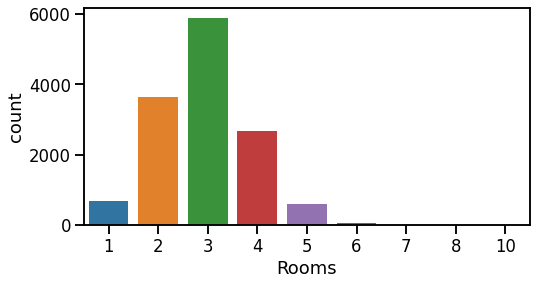

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(melb1_df.Rooms)
plt.xticks(rotation=0)

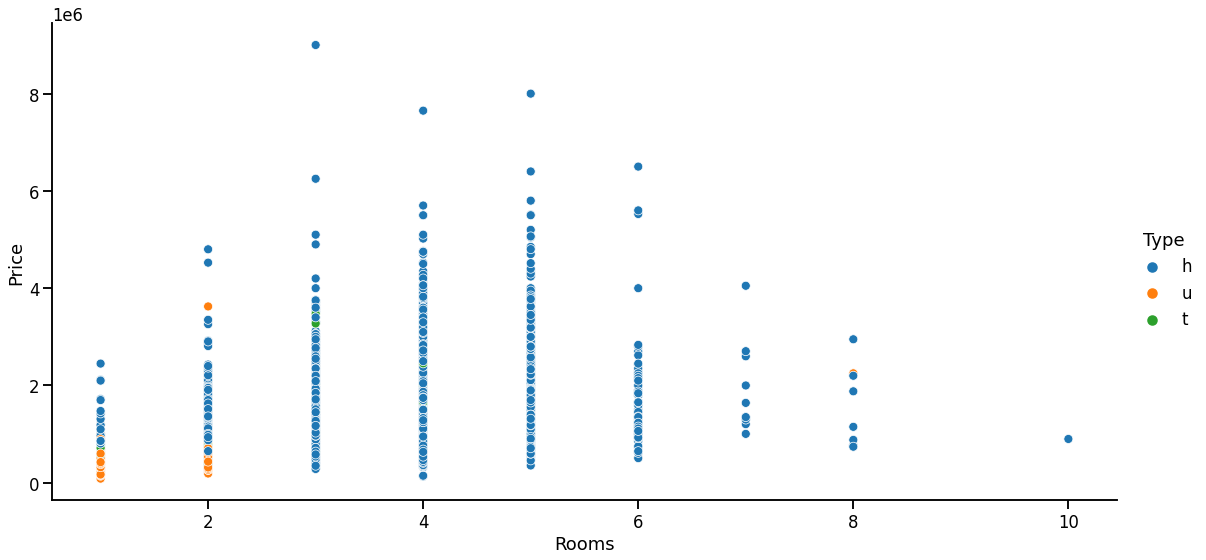

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['Rooms'],hue='Type',
                 aspect=2, height=8)

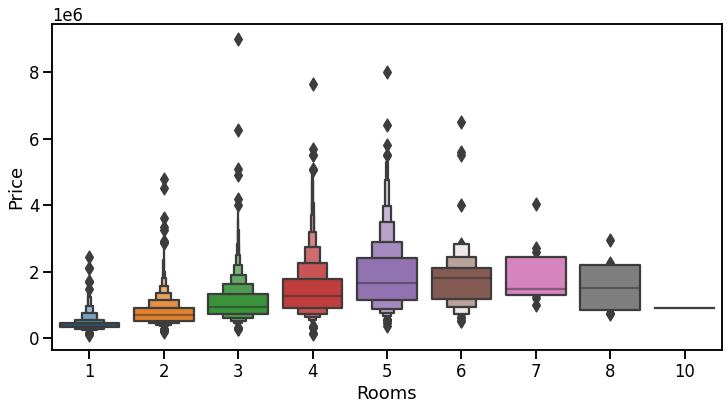

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=melb1_df, x='Rooms', y='Price')

Como se puede ver en el grafico anterior exiete relacion entre numero de habitaciones y Precio, a mayor numero de habitaciones mayor es el precio


####Rooms Vs Bedroom2




In [ ]:
print(melb1_df.loc[:,['Rooms','Bedroom2']])

       Rooms  Bedroom2
0          2       2.0
1          2       2.0
2          3       3.0
3          3       3.0
4          4       3.0
...      ...       ...
13575      4       4.0
13576      3       3.0
13577      3       3.0
13578      4       4.0
13579      4       4.0

[13580 rows x 2 columns]


In [ ]:
a_df= melb1_df['Rooms']-melb1_df['Bedroom2']
a_df

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
13575    0.0
13576    0.0
13577    0.0
13578    0.0
13579    0.0
Length: 13580, dtype: float64

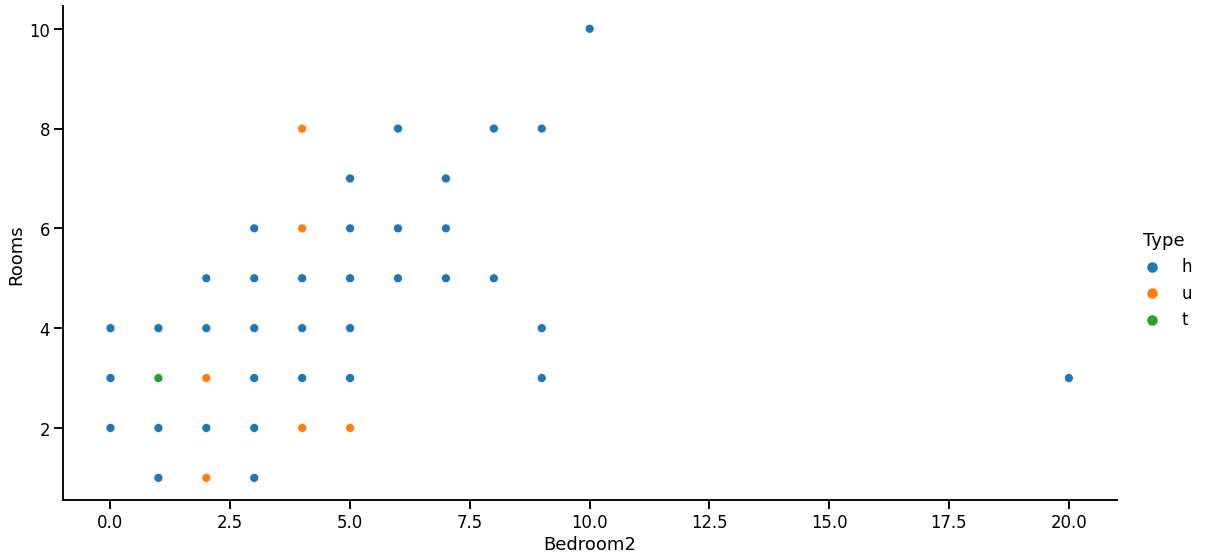

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Rooms'],
                 x_vars=['Bedroom2'],hue='Type',
                 aspect=2, height=8)

Como se puede ver en el grafico anterior la variable Bedroom no es clara y dado que viene de una union de datos se decice quitarla.

####Method Vs TyPe




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

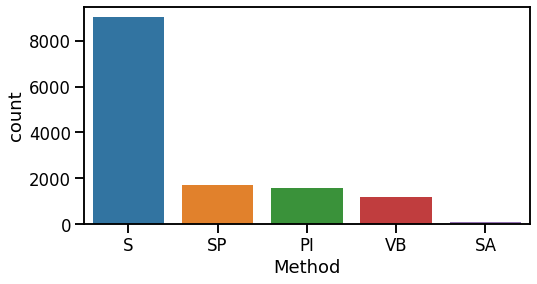

In [ ]:
fig = plt.figure(figsize=(8,4))
COLORS = ["#D0D1E6", "#A6BDDB", "#74A9CF", "#2B8CBE", "#045A8D"]
seaborn.countplot(melb1_df.Method)
plt.xticks(rotation=0)

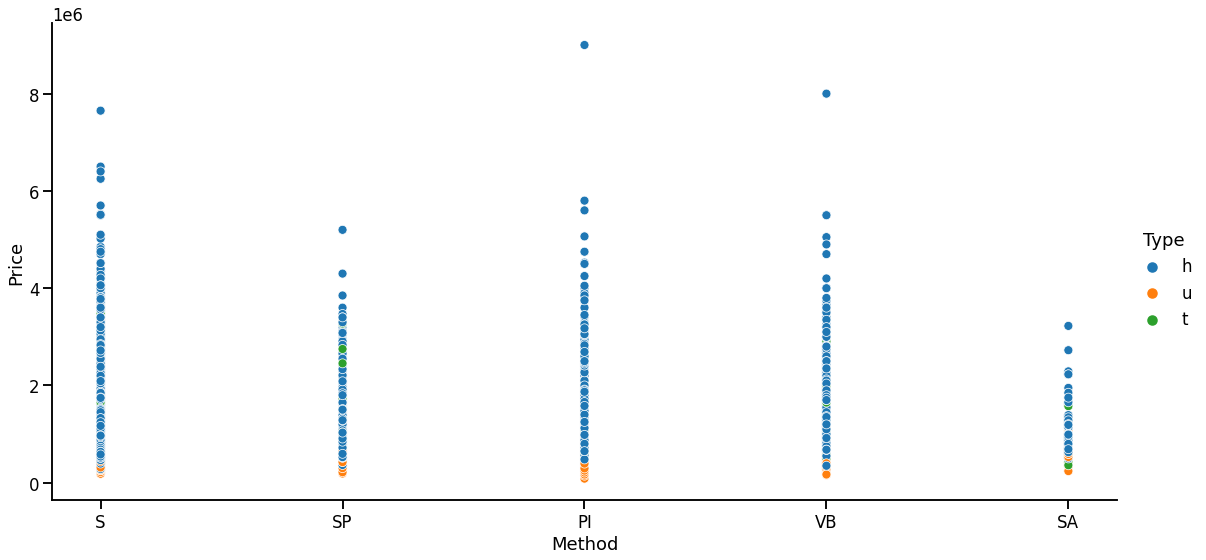

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['Method'],hue='Type',
                 aspect=2, height=8)

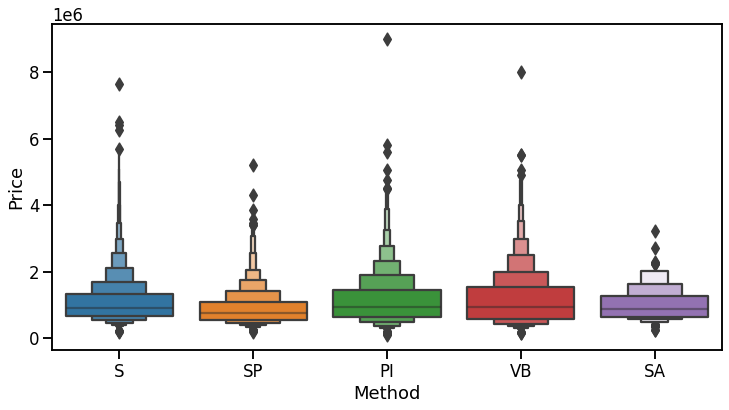

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=melb1_df, x='Method', y='Price')

Se puede ver en el grafico anterior que la mediana de los precios no varia significativamente con los precios

####Seller Vs Price

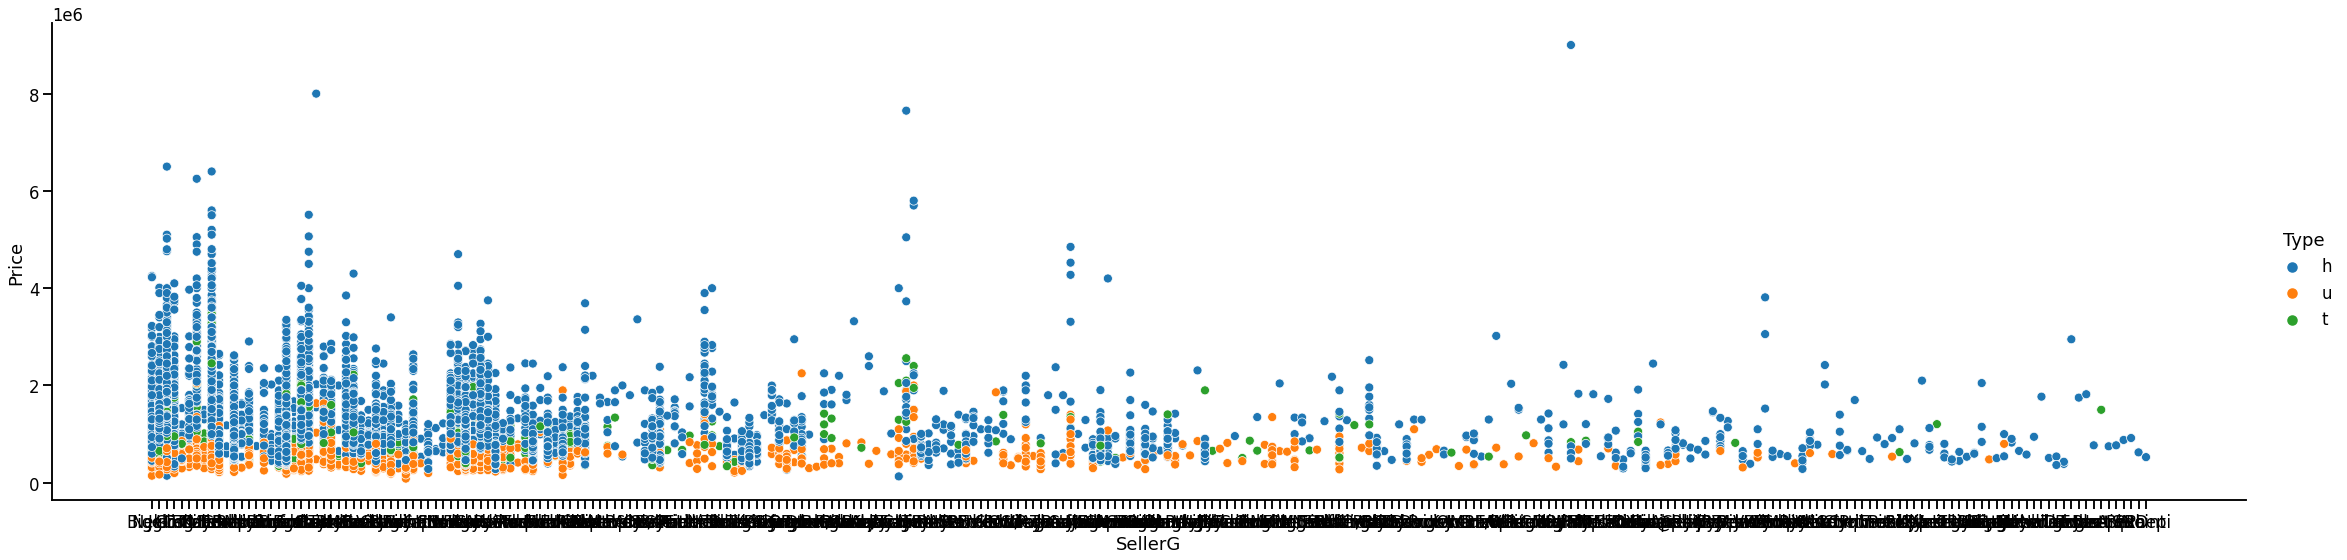

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['SellerG'],hue='Type',
                 aspect=4, height=8)

In [ ]:
#Agrupar por vendedor
vendedor_df = melb1_df.groupby(by=['SellerG']).count()
#experiencia = experiencia['salary_monthly_NETO'].round(decimals = 2).to_frame()
vendedor_df['Price']

SellerG
@Realty                   2
ASL                       4
Abercromby's             21
Ace                       2
Alexkarbon               40
                         ..
hockingstuart/Village     1
iOne                      1
iProperty                 1
iSell                    11
iTRAK                    13
Name: Price, Length: 268, dtype: int64

In [ ]:

vendedor_df

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
SellerG,,,,,,,,,,,,,,,,,,,,
@Realty,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2
ASL,4,4,4,4,4,4,4,4,4,4,4,4,4,0,2,3,4,4,4,4
Abercromby's,21,21,21,21,21,21,21,21,21,21,21,21,21,12,12,19,21,21,21,21
Ace,2,2,2,2,2,2,2,2,2,2,2,1,2,0,0,1,2,2,2,2
Alexkarbon,40,40,40,40,40,40,40,40,40,40,40,40,40,25,27,38,40,40,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hockingstuart/Village,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
iOne,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
iProperty,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Filtrar los vendedores con mas de 500 casas vendidas
vendedor1_df=vendedor_df[ vendedor_df ['Price']>500]
#experiencia = experiencia['salary_monthly_NETO'].round(decimals = 2).to_frame()
vendedor1_df


,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
SellerG,,,,,,,,,,,,,,,,,,,,
Barry,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1011,1010,1011,485,562,885,1011,1011,1011,1011
Buxton,632,632,632,632,632,632,632,632,632,632,632,631,632,325,365,555,632,632,632,632
Jellis,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,1303,1316,727,860,1183,1316,1316,1316,1316
Marshall,659,659,659,659,659,659,659,659,659,659,659,649,659,365,437,585,659,659,659,659
Nelson,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565,1558,1565,842,946,1445,1565,1565,1565,1565
Ray,701,701,701,701,701,701,701,701,701,701,701,701,701,380,419,589,701,701,701,701
hockingstuart,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1167,1160,1167,621,725,1073,1167,1167,1167,1167


In [ ]:
# Filter out Sellers that we want to exclude
# Complete here with your selected list.
interesting_sellers = ["Barry", 'Buxton', 'Jellis', 'Marshall', 'Nelson','Ray', 'hockingstuart']
filtered_df = melb1_df[melb1_df.SellerG.isin(interesting_sellers)]
filtered_df[:5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8110,145.0067,Northern Metropolitan,4019.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

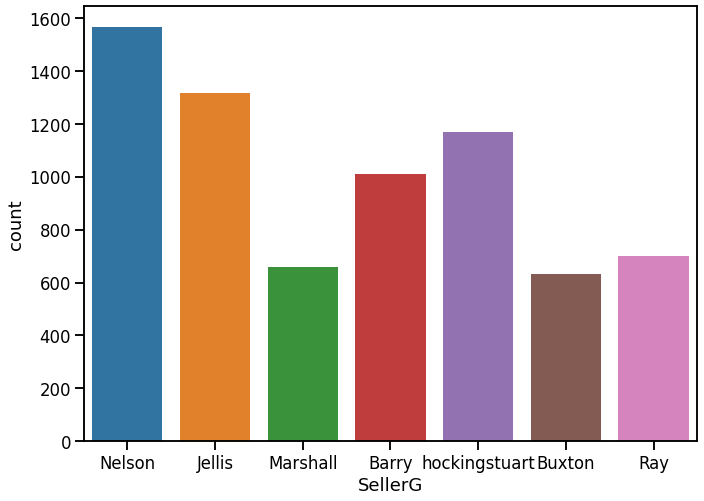

In [ ]:
fig = plt.figure(figsize=(11,8))
seaborn.countplot(filtered_df.SellerG)
plt.xticks(rotation=0)

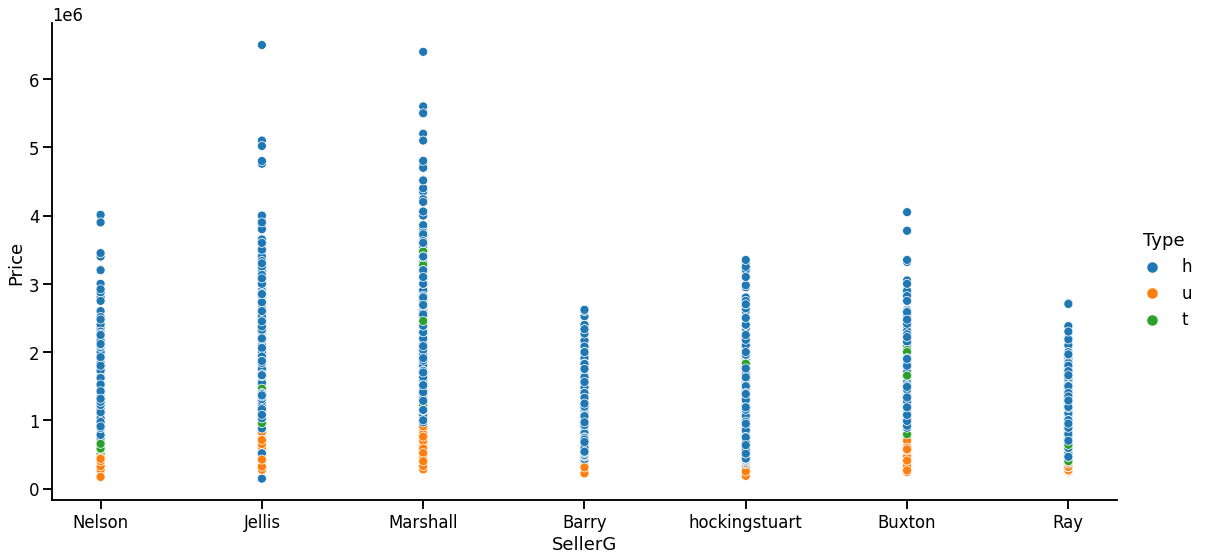

In [ ]:
seaborn.pairplot(data=filtered_df, y_vars=['Price'],
                 x_vars=['SellerG'],hue='Type',
                 aspect=2, height=8)

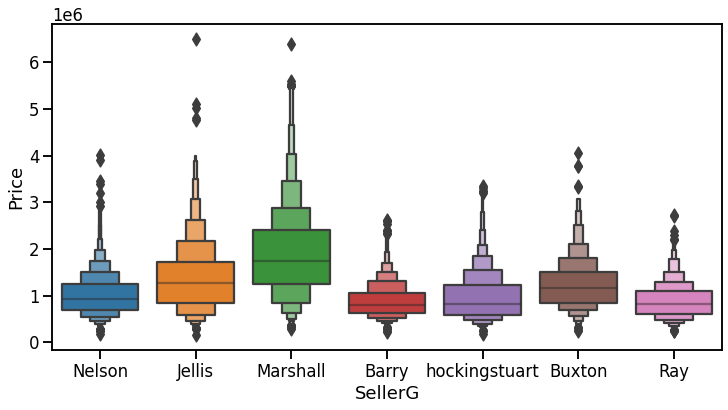

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=filtered_df, x='SellerG', y='Price')

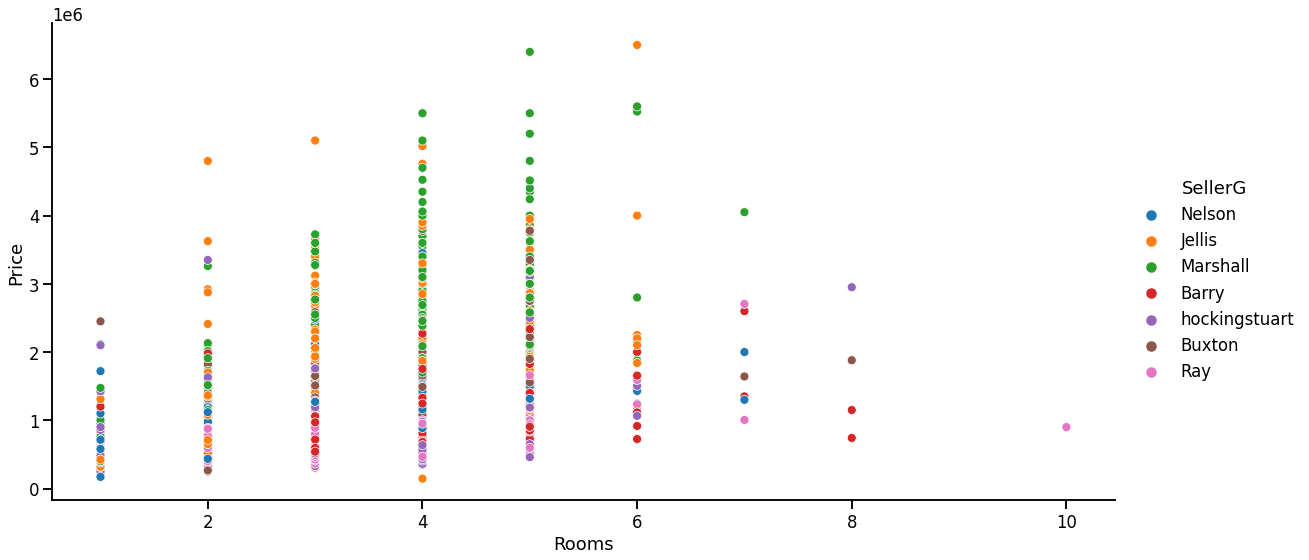

In [ ]:
seaborn.pairplot(data=filtered_df, y_vars=['Price'],
                 x_vars=['Rooms'],hue='SellerG',
                 aspect=2, height=8)

Como se puede ver en los graficos anteriores existe una cierta diferencia de precios segun el vendedor pero se considera que para el estudio no se va a tenber en cuenta esta variable

####Car Vs Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

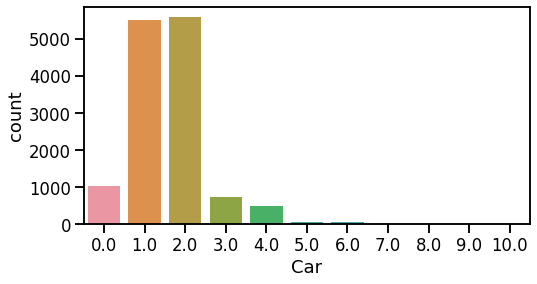

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(melb1_df.Car)
plt.xticks(rotation=0)

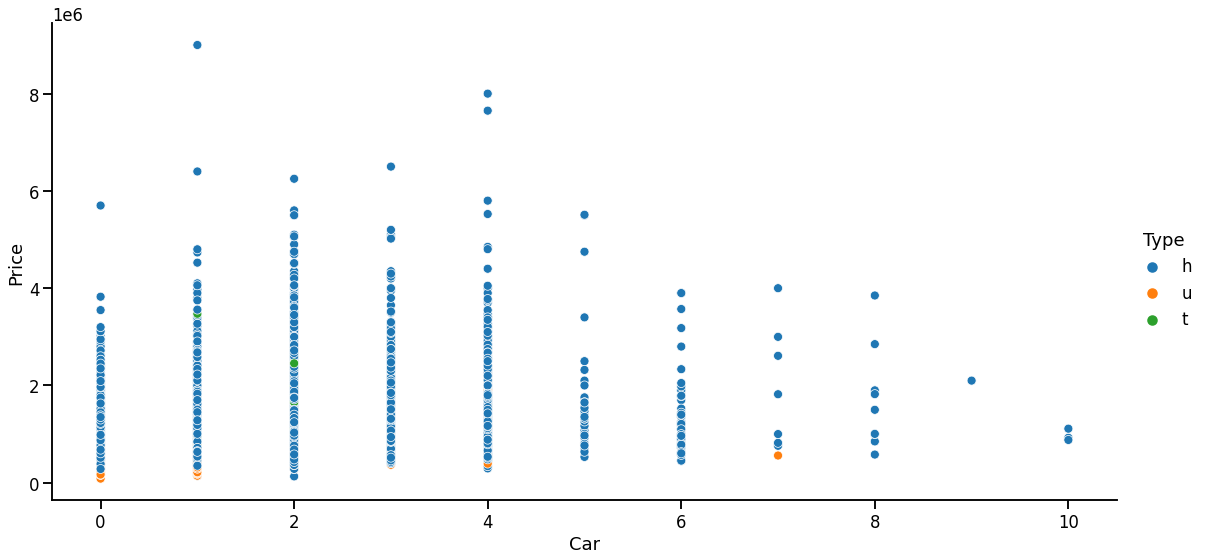

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['Car'],hue='Type',
                 aspect=2, height=8)

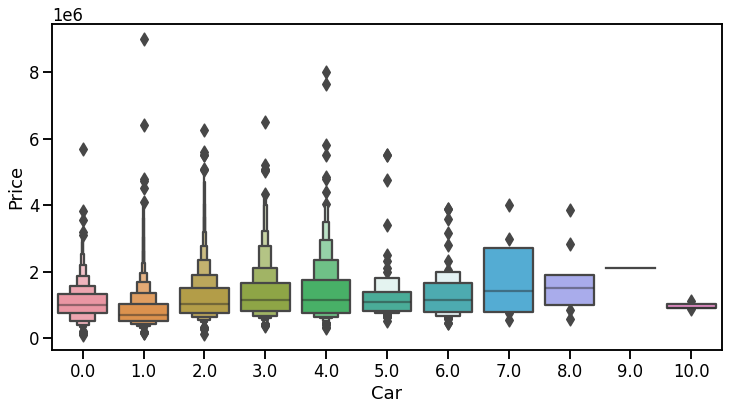

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=melb1_df, x='Car', y='Price')

Se puede ver en el grafico anterior que existe relacion entre el precio de venta y la cantidad de cocheras

####Date Vs Price

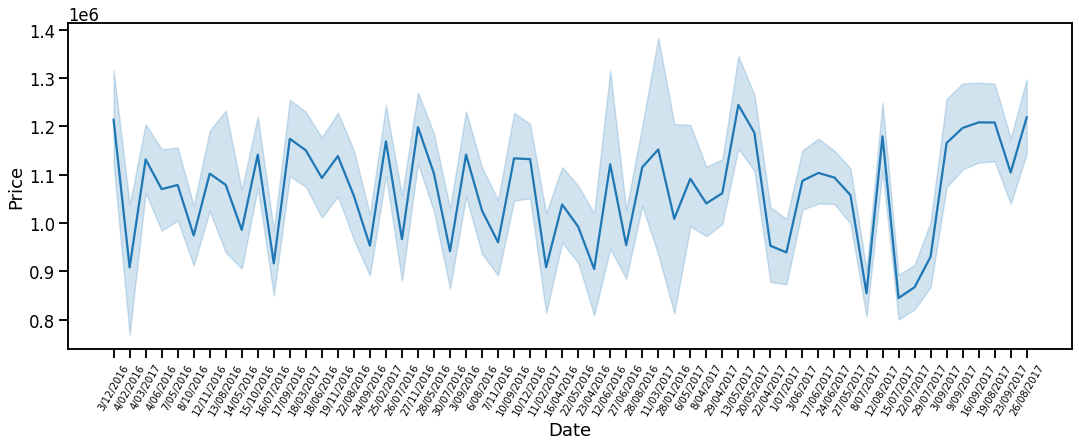

In [ ]:
plt.figure(figsize=(18, 6))
seaborn.lineplot(data=melb1_df,x='Date', y='Price', estimator= 'mean')
plt.xticks(rotation=60, fontsize=10);


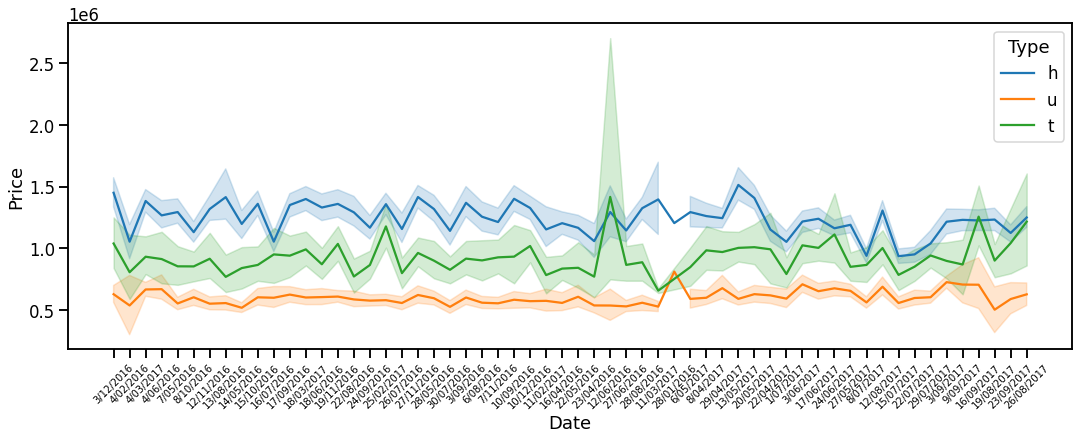

In [ ]:
plt.figure(figsize=(18, 6))
seaborn.lineplot(data=melb1_df,x='Date', y='Price', estimator= 'mean', hue='Type')
plt.xticks(rotation=45,  fontsize=10);

Como se puede ver en el tiempo el precio de venta se mantiene constante este variable no se tendra en cuenta


####Landsize Vs Price




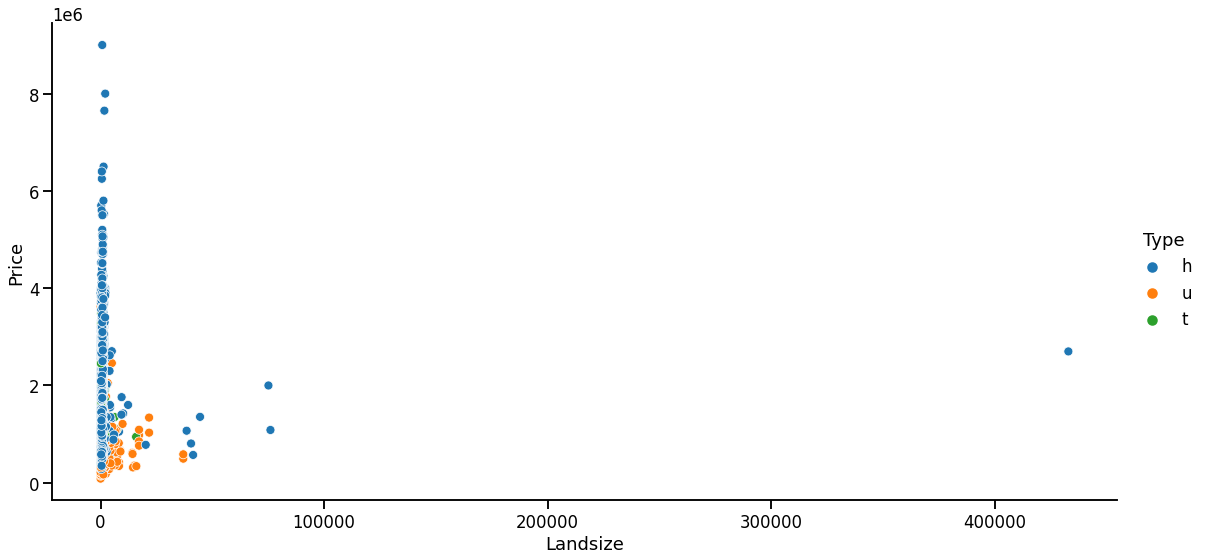

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['Landsize'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


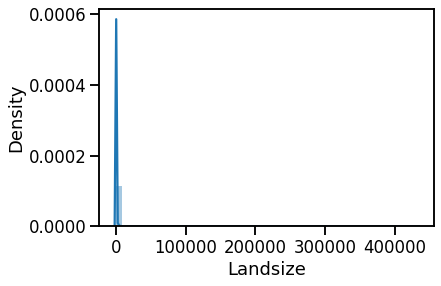

In [ ]:
seaborn.distplot(melb1_df['Landsize'])

Como se puede ver en el grafico anterior, existen valores que esta muy por encima de los valores normales por lo que se tomaran terrenos con superficies  menores a 10000

In [ ]:
#Recortando superficie hasta 10000

land_df = melb1_df[(melb1_df['Landsize']<10000)]

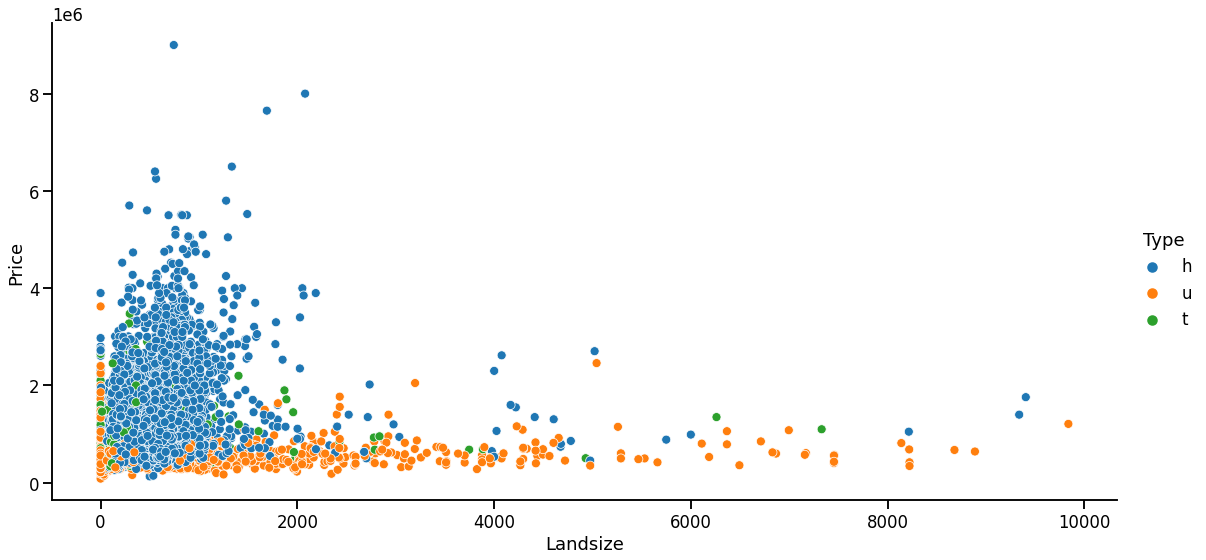

In [ ]:
seaborn.pairplot(data=land_df, y_vars=['Price'],
                 x_vars=['Landsize'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


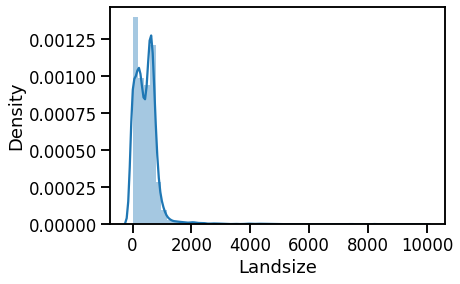

In [ ]:
seaborn.distplot(land_df['Landsize'])


####BuildingArea Vs Price




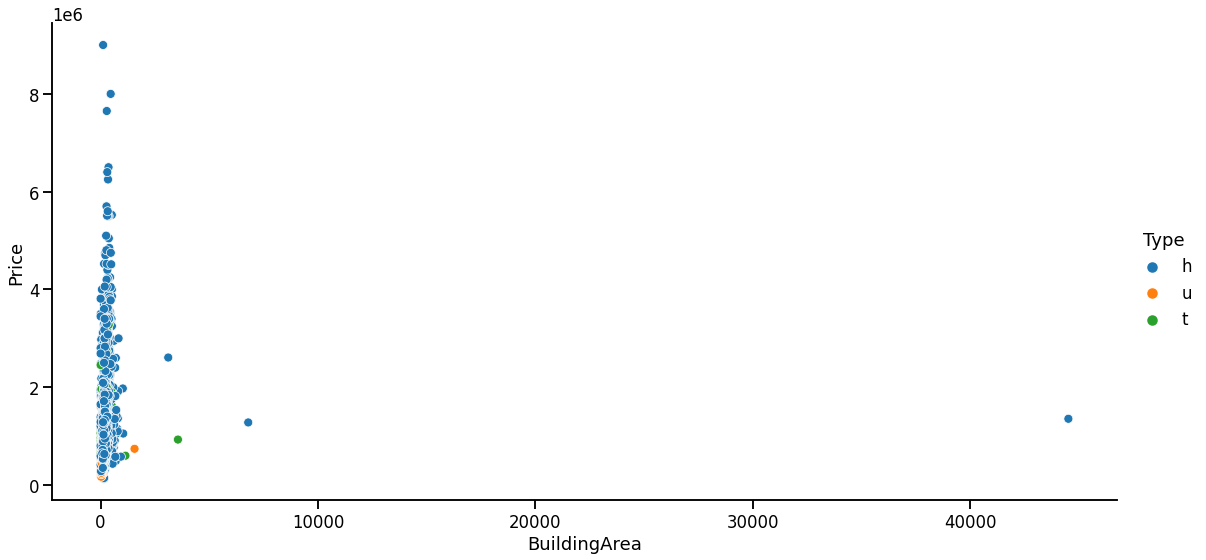

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['BuildingArea'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


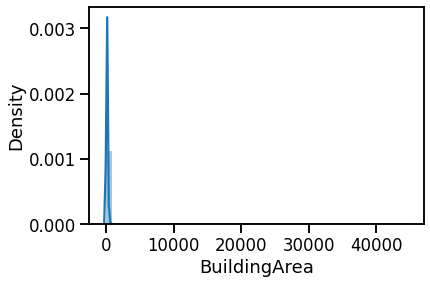

In [ ]:
seaborn.distplot(melb1_df['BuildingArea'])

Como se puede ver en el grafico anterior, existen un valores que esta muy por encima de los valores normales por lo que se tomaran terrenos con superficies  menores a 600

In [ ]:
#Recortando superficie hasta 600
build_df = melb1_df[(melb1_df['BuildingArea']<600)]

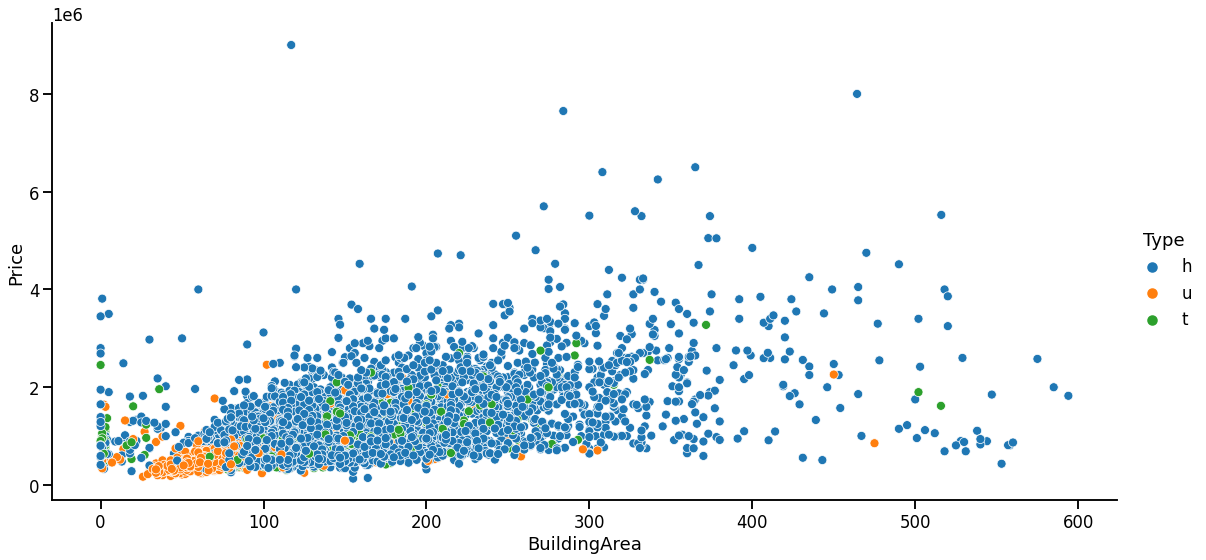

In [ ]:
seaborn.pairplot(data=build_df, y_vars=['Price'],
                 x_vars=['BuildingArea'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


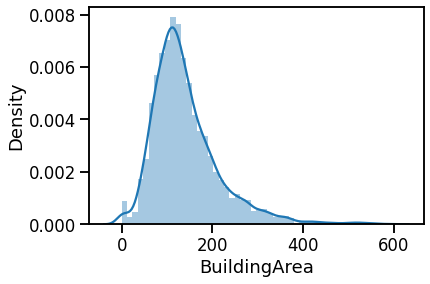

In [ ]:
seaborn.distplot(build_df['BuildingArea'])

####YearBuilt Vs Price

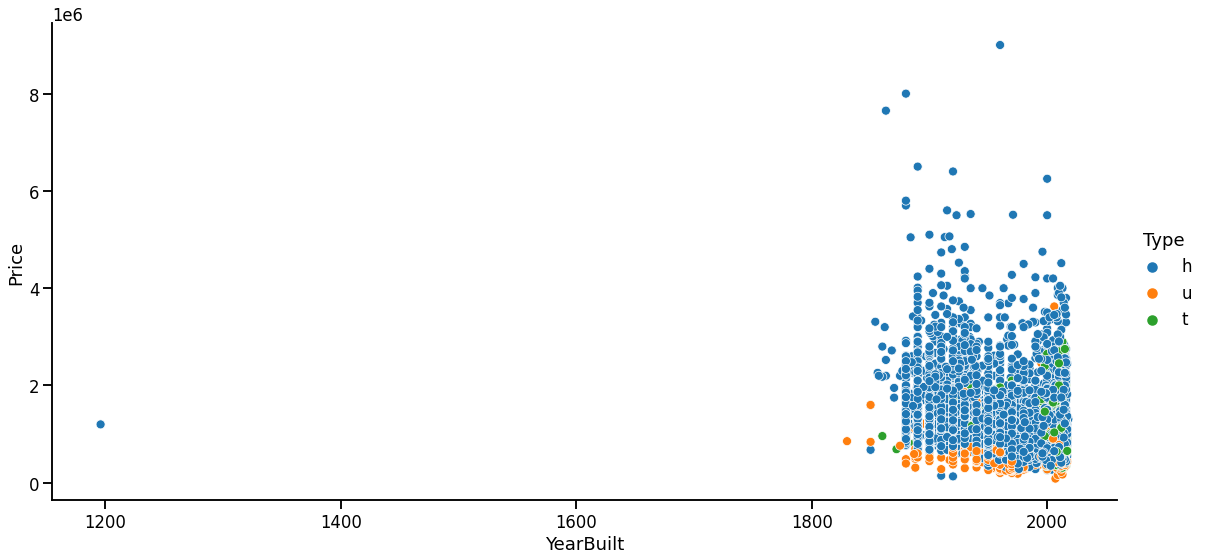

In [ ]:
seaborn.pairplot(data=melb1_df, y_vars=['Price'],
                 x_vars=['YearBuilt'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


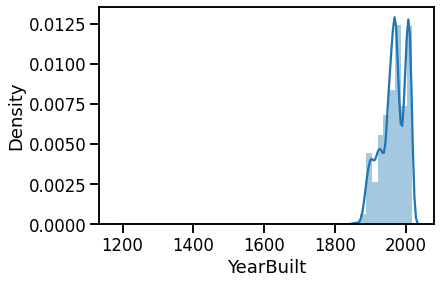

In [ ]:
seaborn.distplot(melb1_df['YearBuilt'])

Para este estudio se consideraran que las viviendas relevantes seran las que fueron construidas despues del año 1900

In [ ]:
#Recortando años menores a 1900
year_df = melb1_df[(melb1_df['YearBuilt']>1900)]

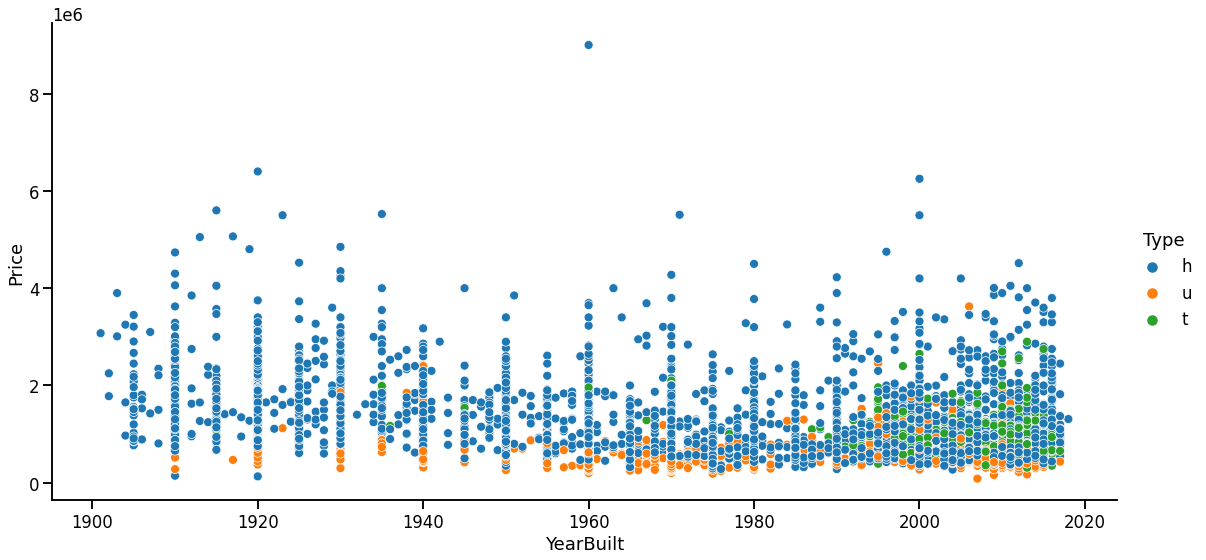

In [ ]:
seaborn.pairplot(data=year_df, y_vars=['Price'],
                 x_vars=['YearBuilt'],hue='Type',
                 aspect=2, height=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


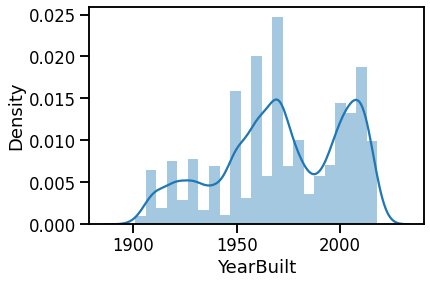

In [ ]:
seaborn.distplot(year_df['YearBuilt'])


###Eliminación de valores extremos




En funcion de lo visto en la visualización se quitaran los siguientes valosres extremos:

*  Outliers en columna precio (2.5 q3)
*   Superficie de terreno mayor a 10000
*   Area construida mayor a 600
*   Construcciones anteriores año 1900







In [ ]:
# Funcion para limitar los boxes segun rango intercuartilico
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

In [ ]:
melb2_df = clean_outliers_q3(melb1_df, 'Price')
melb2_df.shape

(13442, 21)

In [ ]:
#Recortando superficie hasta 10000 y dejando valores nulos
melb3_df = melb2_df[(melb2_df['Landsize']<10000)| (melb2_df.Landsize.isnull())]
melb3_df['Landsize'].max()

9838.0

In [ ]:
melb3_df.shape

(13416, 21)

In [ ]:
#Recortando superficie hasta 600 y dejando valores nulos
melb4_df = melb3_df[(melb3_df['BuildingArea']<600)| (melb3_df.BuildingArea.isnull())]
melb4_df['BuildingArea'].max()

594.0

In [ ]:
melb4_df.shape

(13383, 21)

In [ ]:
#Recortando años menores a 1900 y dejando valores nulos
melb5_df = melb4_df[(melb4_df['YearBuilt']>1900) | (melb4_df.YearBuilt.isnull())]
melb5_df['YearBuilt'].min()

1901.0

In [ ]:
melb5_df.shape

(12696, 21)


###Eliminación de columnas no relevantes




A continuación se listan las columnas  que no se consideran relevantes para definir el precio:

  
*   'Address' para este estudio no se considera la dirección, se considerara el barrio para el precio
*   'SellerG' para este estudio no se considerara al vendedor
*   'Date' se considera que la fecha de venta no deberia incidir en el precio
*   'Distance' No se considera la distancia ya que se considera el barrio
*   'Bedroom2'para este estudio no se considera, se tiene en cuenta Rooms
*   'Lattitude' para este estudio no se considera, se considerara el barrio para el precio
*   'Longtitude' para este estudio no se considera, se considerara el barrio para el precio
*   'Regionname'para este estudio no se considera, se considerara el barrio para el precio
*   'Propertycount'para este estudio no se considera, se considerara el barrio para el precio


###Detección las variables con valor cero del dataset




Se verifica la cantidad de valores cero en cada uno de las columnas

In [ ]:
cols = melb6_df[melb6_df == 0].count(axis=0)
cols[cols > 0]

Bathroom          34
Car              802
Landsize        1901
BuildingArea      16
dtype: int64

In [ ]:
melb6_df=melb5_df.copy()
melb6_df=melb6_df.drop(['Address', 'SellerG', 'Date', 'Distance','Bedroom2', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'], axis=1)
melb6_df

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,2,h,1480000.0,S,3067.0,1.0,1.0,202.0,NaN,NaN
3,Abbotsford,3,h,850000.0,PI,3067.0,2.0,1.0,94.0,NaN,NaN
4,Abbotsford,4,h,1600000.0,VB,3067.0,1.0,2.0,120.0,142.0,2014.0
5,Abbotsford,2,h,941000.0,S,3067.0,1.0,0.0,181.0,NaN,NaN
6,Abbotsford,3,h,1876000.0,S,3067.0,2.0,0.0,245.0,210.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,3150.0,2.0,2.0,652.0,NaN,1981.0
13576,Williamstown,3,h,1031000.0,SP,3016.0,2.0,2.0,333.0,133.0,1995.0
13577,Williamstown,3,h,1170000.0,S,3016.0,2.0,4.0,436.0,NaN,1997.0
13578,Williamstown,4,h,2500000.0,PI,3016.0,1.0,5.0,866.0,157.0,1920.0


Como se puede hay valores que se consideran como un error de carga ya que:
Bathroom no deberia ser cero ya que una casa debe tener aunque sea un baño

*   Bathroom no deberia ser cero ya que una casa debe tener aunque sea un baño
*   Landzise no puede tomar valor 0 es el tamaño del terreno
*   Superficie construida no puede tener valor 0 es el tamaño del terreno

Asignación de 1 baño a propiedades con 0 baños

In [ ]:
melb6_df.loc[melb6_df.Bathroom<1,'Bathroom']=1


Asignacion de la media a propiedades con superficie de terreno igual a 0

In [ ]:
avg_Landsize = melb6_df["Landsize"].mean()
avg_Landsize

484.39035916824196

In [ ]:
melb6_df.loc[melb6_df.Landsize<1| (melb6_df.Landsize.isnull()),'Landsize']=avg_Landsize

In [ ]:
#melb6_df.loc[melb6_df.Landsize<1,'Landsize']=avg_Landsize

Asignacion de la media a propiedades con superficie construida igual a 0

In [ ]:
avg_BuildingArea = melb6_df["BuildingArea"].mean()
avg_BuildingArea

139.84286872948897

In [ ]:
melb6_df.loc[melb6_df.BuildingArea<1| (melb6_df.BuildingArea.isnull()),'BuildingArea']=avg_BuildingArea

Se verifica nuevamente la cantidad de valores cero en cada uno de las columnas

In [ ]:
cols = melb6_df[melb6_df == 0].count(axis=0)
cols[cols > 0]

Car    802
dtype: int64


###Reconocimiento de datos faltantes




Se buscarann los valores faltantes

In [ ]:
melb6_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12696 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        12696 non-null  object 
 1   Rooms         12696 non-null  int64  
 2   Type          12696 non-null  object 
 3   Price         12696 non-null  float64
 4   Method        12696 non-null  object 
 5   Postcode      12696 non-null  float64
 6   Bathroom      12696 non-null  float64
 7   Car           12656 non-null  float64
 8   Landsize      12696 non-null  float64
 9   BuildingArea  6399 non-null   float64
 10  YearBuilt     7384 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
missing_values_count = melb6_df.isna().sum()
missing_values_count

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Postcode           0
Bathroom           0
Car               40
Landsize           0
BuildingArea    6297
YearBuilt       5312
dtype: int64

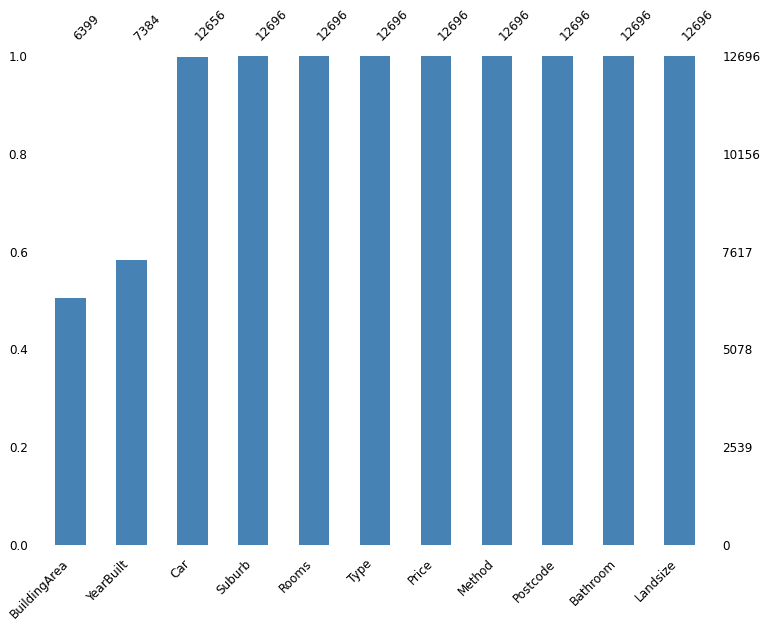

In [ ]:
msno.bar(melb6_df,figsize=(12, 9), sort="ascending",fontsize=12, color='steelblue') 


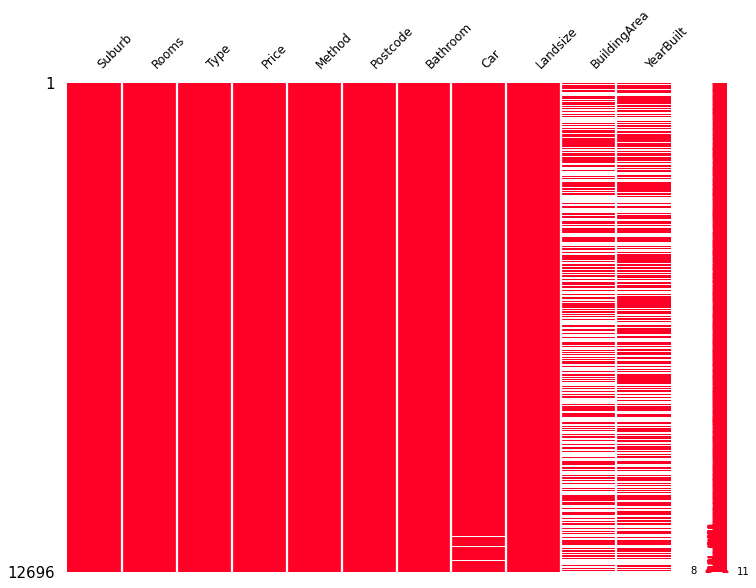

In [ ]:
msno.matrix(melb6_df,figsize=(12, 9), fontsize=12, color=[1,0,0.15])

Realizamos copia final del dataset

In [ ]:
melb7_df=melb6_df.copy()
melb7_df

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,2,h,1480000.0,S,3067.0,1.0,1.0,202.0,NaN,NaN
3,Abbotsford,3,h,850000.0,PI,3067.0,2.0,1.0,94.0,NaN,NaN
4,Abbotsford,4,h,1600000.0,VB,3067.0,1.0,2.0,120.0,142.0,2014.0
5,Abbotsford,2,h,941000.0,S,3067.0,1.0,0.0,181.0,NaN,NaN
6,Abbotsford,3,h,1876000.0,S,3067.0,2.0,0.0,245.0,210.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,S,3150.0,2.0,2.0,652.0,NaN,1981.0
13576,Williamstown,3,h,1031000.0,SP,3016.0,2.0,2.0,333.0,133.0,1995.0
13577,Williamstown,3,h,1170000.0,S,3016.0,2.0,4.0,436.0,NaN,1997.0
13578,Williamstown,4,h,2500000.0,PI,3016.0,1.0,5.0,866.0,157.0,1920.0


##2- Agregado de información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 

  

### 1- Selección de variables a agregar y combinaciones aplicar a cada una. 

Carga archivo AIRBNB

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv

airbnb_data = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
airbnb_data [:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,2.018120e+13,12/7/2018,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,https://www.airbnb.com/rooms/10803,2.018120e+13,12/7/2018,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,...,9.0,9.0,f,NaN,t,moderate,t,t,1,1.50
2,12936,https://www.airbnb.com/rooms/12936,2.018120e+13,12/7/2018,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,...,9.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,17,0.15


In [ ]:
airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

Carga de columnas de interes

In [ ]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airbnb_df

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,We offer comfortable accommodation in Inner Me...,NaN,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22890,"near city, near tram station",NaN,"Carlton, VIC, Australia",Carlton,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,55,NaN,NaN
22891,"Close to: Melton Rail, Coles, Coffee Lounge an...",NaN,"Melton South, VIC, Australia",NaN,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,129,NaN,NaN
22892,"Hi, 我是一名中国留学生. 由于暑假原因决定出租我的房间. 我会留下我所使用的物品给我的租...",NaN,"Glen Waverley, VIC, Australia",NaN,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,53,NaN,NaN
22893,Immaculately presented and carefully maintaine...,A plethora of Melbourne highlights are just a ...,"Southbank, VIC, Australia",Southbank,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,130,NaN,NaN



####Detección las variables con valor cero del dataset AIRBNB




In [ ]:
cols = airbnb_df[airbnb_df == 0].count(axis=0)
cols[cols > 0]

price    21
dtype: int64


####Reconocimiento de datos faltantes del dataset AIRBNB




Se buscaran los valores faltantes

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22895 entries, 0 to 22894
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description            22563 non-null  object 
 1   neighborhood_overview  14424 non-null  object 
 2   street                 22895 non-null  object 
 3   neighborhood           17082 non-null  object 
 4   city                   22895 non-null  object 
 5   suburb                 22872 non-null  object 
 6   state                  22834 non-null  object 
 7   zipcode                22753 non-null  object 
 8   latitude               22895 non-null  float64
 9   longitude              22895 non-null  float64
 10  price                  22895 non-null  int64  
 11  weekly_price           2524 non-null   float64
 12  monthly_price          1891 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
missing_values_count = melb6_df.isna().sum()
missing_values_count

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Postcode           0
Bathroom           0
Car               40
Landsize           0
BuildingArea    6297
YearBuilt       5312
dtype: int64

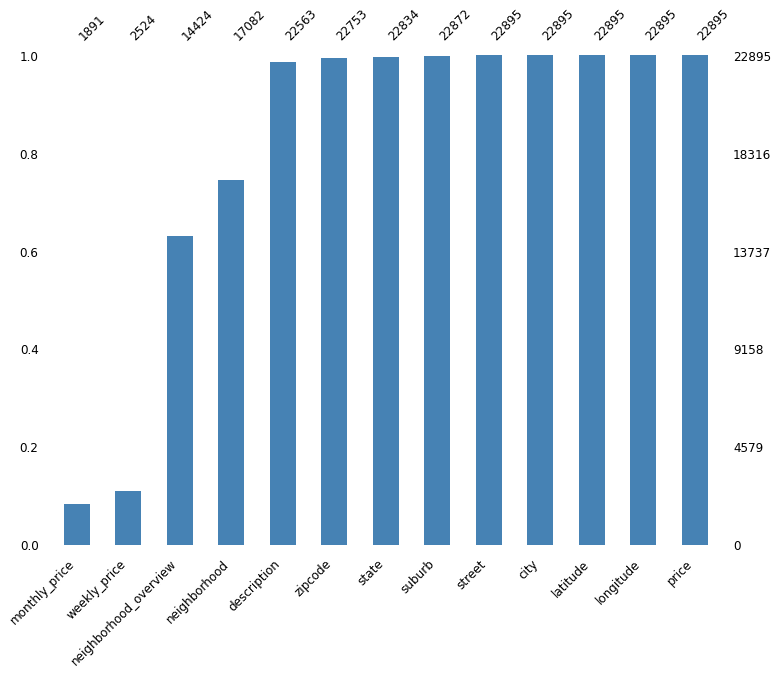

In [ ]:
msno.bar(airbnb_df,figsize=(12, 9), sort="ascending",fontsize=12, color='steelblue') 


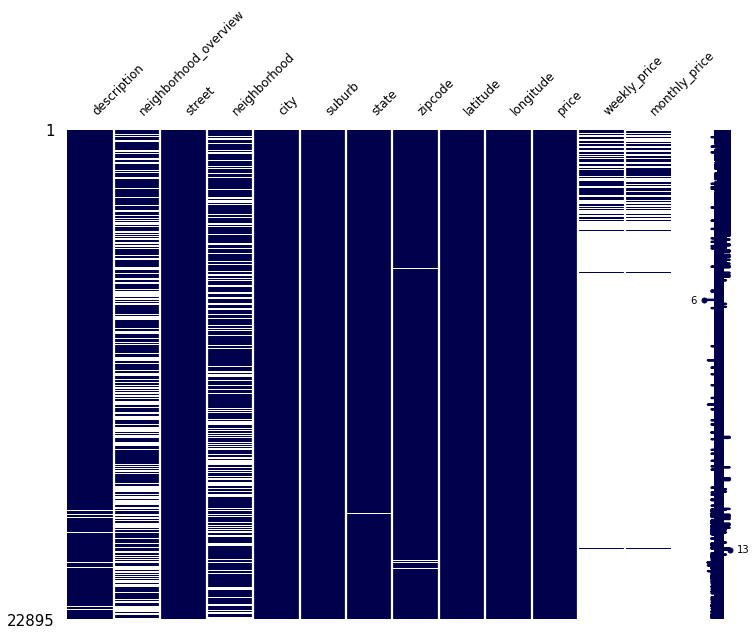

In [ ]:
msno.matrix(airbnb_df,figsize=(12, 9), fontsize=12, color=[0,0,0.3])

Para poder realizar esta combinación de datos, tenemos que encontrar una columna que contenga información en común. Utilizaremos el zipcode.


In [ ]:
airbnb_df.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

El zipcode tiene tipos diferentes, que se estandarizaran antes de continuar con la combinación de los datos.

In [ ]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.zipcode.value_counts().head(5)

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
Name: zipcode, dtype: int64

#### Valores en común

Antes de unir los conjuntos de datos, se verificara que se cuenten con suficientes registros en común como para agregar información relevantes.

In [ ]:
intersection = numpy.intersect1d(
    airbnb_df.zipcode.values, melb7_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("Sales unique zipcodes", len(melb7_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 196
Common zipcodes 190


In [ ]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb6_df.Postcode.isin(intersection).sum() / len(melb7_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      airbnb_df.zipcode.isin(intersection).sum() / len(airbnb_df))

Records in Sales df with corresponding zipcode form Airbnb df 0.998660995589162
Records in Airbnb df with corresponding zipcode form Sales df 0.9302031011137804


### 2- Unión de los conjuntos de datos utilizando la variable zipcode. 

#### Operación merge

Es hora de combinar ambos conjuntos de datos. Una opción frecuentemente tentadora es aplicar la operación merge sin analizar demasiado la situación. Sin embargo, ¡esta operación puede ocasionar una **explosión exponencial** de nuestro conjunto de datos!

¿Por qué la siguiente operación genera un DataFrame con 2 millones de filas? 

In [ ]:
## Incorrecto!
len(melb6_df.merge(airbnb_df, how='left',
                  left_on='Postcode', right_on='zipcode'))

1910189

Recordemos que nuestro objetivo es agregar información sobre el valor del vecindario de la propiedad. ¿Qué información del conjunto de airbnb nos sirve para representar esto?

* Promedio de `price` por zipcode
* Promedio de `weekly_price` por zipcode
* Promedio de `monthly_price` por zipcode


In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price']

Cuando queremos agregar un único dato luego de agrupar un DataFrame, la operación es bastante sencilla. Sólo tienen que tener en cuenta que el nombre de la columnas será el mismo, aunque su valor ahora esté agregado.

In [ ]:
# Option 1: inefficient form.
# The aggregation is calculated over all columns, and after is calculated
# we filter only the columns we want.
# airbnb_df.groupby('zipcode').mean()[relevant_cols].reset_index()[:5]

# Option 2: efficient form
# First we filter out the columns we want, and then we only aggregate
# those. Be careful to include the grouping column as well.
airbnb_df[relevant_cols + ['zipcode']]\
  .groupby('zipcode').mean().reset_index()[:5]

,zipcode,price,weekly_price,monthly_price
0,2010.0,40.000000,NaN,NaN
1,2134.0,50.000000,NaN,NaN
2,2582.0,104.000000,NaN,NaN
3,3000.0,150.504307,918.738956,3407.204651
4,3001.0,132.500000,NaN,NaN


Agrupar y agregar utilizando más de un tipo de operación es un poco más complicado. Pandas nos provee de muchas formas de escribir la misma operación. Ninguna de ellas es muy intuitiva, y usualmente requiere renombrar las columnas para darles nombres más significativos.

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()

In [ ]:
airbnb_price_by_zipcode

zipcode       price       weekly_price monthly_price
                    mean count         mean          mean
0     2010.0   40.000000     1          NaN           NaN
1     2134.0   50.000000     1          NaN           NaN
2     2582.0  104.000000     1          NaN           NaN
3     3000.0  150.504307  3367   918.738956   3407.204651
4     3001.0  132.500000     2          NaN           NaN
..       ...         ...   ...          ...           ...
242   7367.0  230.000000     1          NaN           NaN
243   8938.0  296.000000     1          NaN           NaN
244   9004.0  226.000000     1          NaN           NaN
245   9540.0  245.000000     1          NaN           NaN
246  30122.0   75.000000     1   525.000000   2281.000000

[247 rows x 5 columns]

In [ ]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'monthly_price mean': 'airbnb_monthly_price_mean'}
)

## Option 2
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
# airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
#   .agg(airbnb_record_count=('price', 'count'),
#        airbnb_price_mean=('price', 'mean'),
#        airbnb_weekly_price_mean=('weekly_price', 'mean'),
#        airbnb_monthly_price_mean=('monthly_price', 'mean'))\
#   .reset_index()

airbnb_price_by_zipcode[:3]

,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,40.0,1,NaN,NaN
1,2134.0,50.0,1,NaN,NaN
2,2582.0,104.0,1,NaN,NaN


Guardamos el dataset construido ya que nos sera util para el entregable

In [ ]:
airbnb_price_by_zipcode.to_csv("airbnb_price_by_zipcode.csv", index=None)

In [ ]:
from google.colab import files
files.download('airbnb_price_by_zipcode.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Finalmente hacemos la combinacion de ambos datasets creados

In [ ]:
merged_sales_df = melb7_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
merged_sales_df

,Suburb,Rooms,Type,Price,Method,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,S,3067.0,1.0,1.0,202.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,3,h,850000.0,PI,3067.0,2.0,1.0,94.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,4,h,1600000.0,VB,3067.0,1.0,2.0,120.0,142.0,2014.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,2,h,941000.0,S,3067.0,1.0,0.0,181.0,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,3,h,1876000.0,S,3067.0,2.0,0.0,245.0,210.0,1910.0,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12691,Wheelers Hill,4,h,1245000.0,S,3150.0,2.0,2.0,652.0,NaN,1981.0,3150.0,124.026455,189.0,526.350000,1901.611111
12692,Williamstown,3,h,1031000.0,SP,3016.0,2.0,2.0,333.0,133.0,1995.0,3016.0,191.094595,74.0,612.250000,2119.750000
12693,Williamstown,3,h,1170000.0,S,3016.0,2.0,4.0,436.0,NaN,1997.0,3016.0,191.094595,74.0,612.250000,2119.750000
12694,Williamstown,4,h,2500000.0,PI,3016.0,1.0,5.0,866.0,157.0,1920.0,3016.0,191.094595,74.0,612.250000,2119.750000


In [ ]:
merged_sales_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

### 3- Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. 

Se podrian utilizar las siguientes variables para unir datos:


*   Por barrios a traves de las variables 'Suburb' y 'suburb'
*   Por barrios a traves de las variables 'CouncilArea' y 'city'




##Ejercicio 3:


Creación y guardado del nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
merged_sales_df.to_csv("melb_data_extended.csv", index=None)

In [ ]:
from google.colab import files
files.download('melb_data_extended.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>